In [1]:
%run common.ipynb

# Split Apply Combine

https://www.researchgate.net/publication/51028554_The_Split-Apply-Combine_Strategy_for_Data_Analysis
    
What is `split-apply-combine`?

`split-apply-combine` is a common data analysis strategy used whenever a big problem needs to be  broken into smaller manageable pieces, operated on each piece separately and then put all the pieces back together. It was coined by **Hadley Wickam** in his paper `The Split-Apply-Combine Strategy for Data Analysis`

* **Splitting** the data into groups based on some criteria.

* **Applying** a function to each group independently.

* **Combining** the results into a data structure.

Where to use this strategy?

1. Data preparation - group wise ranking, standardization, normalization, or creating new variables
2. Creating summaries for analysis/display 
3. Modeling: Fit separate models to different groups of data


Tools that can be used for this strategy
1. SQL - group by operator
2. Excel - pivot table
3. R - plyr package

## `split-apply-combine` with Pandas

In Pandas,  `split-apply-combine` is done using groupby.

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

Let's import all the necessary libraries first.

In [2]:
import pandas as pd
import numpy as np

# paths to the most commonly used dataset repositories for this lab

# path to pandas_for_everyone datasets repository
pfe_rep_path = 'https://raw.githubusercontent.com/chendaniely/pandas_for_everyone/master/data/'

# path to data-wrangling-datasets repository
sv_rep_path = '../data/'

## Splitting an object into groups

Let's create a dataframe and use the groupby method to see how it works

In [3]:
df = pd.DataFrame({
    'key': ['X', 'Y', 'Z', 'X', 'Y', 'Z', 'X', 'Y', 'Z'],
    'value': range(9),
}, columns = ['key', 'value'])

df

,key,value
0,X,0
1,Y,1
2,Z,2
3,X,3
4,Y,4
5,Z,5
6,X,6
7,Y,7
8,Z,8


The groupby object is created using the `.groupby()` method.

In [4]:
groups = df.groupby('key')

#print the groupby object
groups

The groupby method splits the dataframe into groups based on a the key column/row specified and stores it as a groupby object. The groups can be accessed by iterating over the groupby object or using the `get_group()` method.

In [5]:
for name, group in groups:
    print('name: ', name)
    print(group)

name:  X
  key  value
0   X      0
3   X      3
6   X      6
name:  Y
  key  value
1   Y      1
4   Y      4
7   Y      7
name:  Z
  key  value
2   Z      2
5   Z      5
8   Z      8


In [6]:
# get_group() method takes the group name as argument
groups.get_group("Z")

,key,value
2,Z,2
5,Z,5
8,Z,8


## Apply functions

Once the GroupBy object has been created, several methods are available to perform a computation on the grouped data

1. Aggregation: Compute a summary statistic (or statistics) for each group.

2. Transformation: Perform some group-specific computations and return a like-indexed object i.e. a table of the same dimension. 

3. Filteration:  Discard some groups, according to a group-wise computation that evaluates True or False.

## Aggregation

It is also known as summarization. With aggregation, data reduction is involved . Aggregate takes a series of values performs a specific calculation and replaces the series with a single value.

<img src = "images/split_apply_combine_agg.PNG">


In [7]:
groups = df.groupby('key').mean()
groups

,value
key,
X,3.0
Y,4.0
Z,5.0


### Gapminder dataset


Website https://www.gapminder.org/ Gapminder is an independent Swedish foundation with no political, religious, or economic affiliations. 

We further explore the dataset we tidied up in our "Health and Wealth of Nations" homework.

The semantics of the gapminder dataset: Each observation is a record of the population, life expectancy and income of each country of each continent for the years ranging from 1800-2050.



In [8]:
source = sv_rep_path + 'gapminder_dataset.csv'
gapminder = pd.read_csv(source)
gapminder.drop("Unnamed: 0", axis=1,inplace=True)
gapminder

,country,year,pop,income,lifeExp,Continent
0,Afghanistan,1800,3280000.0,674.0,28.2,Asia
1,Afghanistan,1801,3280000.0,674.0,28.2,Asia
2,Afghanistan,1802,3280000.0,674.0,28.2,Asia
3,Afghanistan,1803,3280000.0,674.0,28.2,Asia
4,Afghanistan,1804,3280000.0,674.0,28.2,Asia
...,...,...,...,...,...,...
46681,Zimbabwe,2046,22800000.0,3880.0,66.9,Africa
46682,Zimbabwe,2047,23100000.0,3960.0,67.1,Africa
46683,Zimbabwe,2048,23400000.0,4050.0,67.3,Africa
46684,Zimbabwe,2049,23700000.0,4130.0,67.4,Africa


### One variable aggregation

Goal: Compute the mean life expectancy for each year in the dataset. 

To compute for an individual year we can filter the data by boolean subsetting. To compute the mean for all the years, we use the groupby method. Note the length of the combined output.

In [9]:
gapminder.groupby('year').lifeExp.mean()

year
1800    31.503763
1801    31.463441
1802    31.480108
1803    31.385484
1804    31.460753
          ...    
2046    77.497312
2047    77.643011
2048    77.795161
2049    77.932796
2050    78.075269
Name: lifeExp, Length: 251, dtype: float64

There are several methods that can be used with GroupBy Objects. 
Built-in aggregation methods:

* count
* size
* mean
* std
* min
* quantile
* max
* sum
* var
* sem
* describe
* first
* last
* nth

documentation: https://pandas.pydata.org/docs/reference/groupby.html#computations-descriptive-stats

### .agg method

Apart from the built in functions one may create custom functions that take a series as input and returns a value. These functions can be passed to the `.agg()` function.  

In [10]:
def my_func(series):
    return (series.max() - series.min())/series.count()

gapminder.groupby('year').lifeExp.agg(my_func)

year
1800    0.104839
1801    0.090860
1802    0.112903
1803    0.135484
1804    0.104301
          ...   
2046    0.153226
2047    0.152151
2048    0.151613
2049    0.151075
2050    0.150538
Name: lifeExp, Length: 251, dtype: float64

### Multiple functions on one column

One can aggregate using multiple functions using the .agg() method

In [11]:

gapminder.groupby('year').lifeExp.agg([my_func, 'mean', np.std, np.var])

,my_func,mean,std,var
year,,,,
1800,0.104839,31.503763,3.809510,14.512364
1801,0.090860,31.463441,3.801217,14.449251
1802,0.112903,31.480108,3.932344,15.463332
1803,0.135484,31.385484,3.955872,15.648923
1804,0.104301,31.460753,3.928388,15.432235
...,...,...,...,...
2046,0.153226,77.497312,6.186773,38.276155
2047,0.152151,77.643011,6.171231,38.084086
2048,0.151613,77.795161,6.160013,37.945760


### Single function on multiple columns

If the selected aggregate function does not suit the column, then it is dropped

In [12]:
gapminder.groupby(['year', 'Continent'] ).mean()


pop        income    lifeExp
year Continent                                           
1800 Africa         1.503322e+06    696.814815  30.525926
     Asia           1.515597e+07   1039.170213  29.670213
     Europe         3.949462e+06   1519.023810  35.430952
     North America  6.784952e+05   1121.857143  31.100000
     Oceania        1.471100e+05    771.000000  28.020000
...                          ...           ...        ...
2050 Asia           1.150105e+08  41275.106383  79.402128
     Europe         1.411650e+07  70745.238095  83.183333
     North America  3.292948e+07  32530.476190  79.966667
     Oceania        5.624400e+06  22817.000000  72.990000
     South America  4.091208e+07  25180.000000  80.816667

[1506 rows x 3 columns]

### Aggregate by column specific functions

So far we've aggregated values of a single column. We may be interested to do so on multiple columns. For example to know the `mean`, `min` and `max` life expectancy of a `continent` on a particular `year`

In [13]:
gapminder.groupby(['year', 'Continent'] ).agg({'pop': 'median', 'income': 'median', 'lifeExp': ['min', 'max', 'mean']})


pop   income lifeExp                 
                        median   median     min   max       mean
year Continent                                                  
1800 Africa           876000.0    642.0    25.1  37.0  30.525926
     Asia            1750000.0   1020.0    23.4  36.4  29.670213
     Europe          1875000.0   1410.0    28.7  42.9  35.430952
     North America    130000.0    977.0    25.4  39.4  31.100000
     Oceania           52150.0    697.5    24.3  34.0  28.020000
...                        ...      ...     ...   ...        ...
2050 Asia           24000000.0  26400.0    69.9  88.6  79.402128
     Europe          6425000.0  68050.0    74.4  88.0  83.183333
     North America   5850000.0  25700.0    70.3  86.2  79.966667
     Oceania          813500.0   8385.0    62.3  86.6  72.990000
     South America  21800000.0  24400.0    70.6  86.5  80.816667

[1506 rows x 5 columns]

## transform

Transform is an operation used in conjunction with groupby. It performs some group-specific computations and returns a like-indexed object. It does a one-to-one transformation. Data is not reduced. The image below illustrates this concept.

<img src = "images/split_apply_combine_transform.PNG">

We can compare aggregate and transform. Note the shape of the returned dataframes

In [14]:
gapminder.groupby('year').lifeExp.agg('mean')

year
1800    31.503763
1801    31.463441
1802    31.480108
1803    31.385484
1804    31.460753
          ...    
2046    77.497312
2047    77.643011
2048    77.795161
2049    77.932796
2050    78.075269
Name: lifeExp, Length: 251, dtype: float64

In [15]:
gapminder.groupby('year').lifeExp.transform('mean')

0        31.503763
1        31.463441
2        31.480108
3        31.385484
4        31.460753
           ...    
46681    77.497312
46682    77.643011
46683    77.795161
46684    77.932796
46685    78.075269
Name: lifeExp, Length: 46686, dtype: float64

### Goal: What is the proportional income of each continent for each year in the gapminder dataset?

We do this in two steps:
1. Split by `['year', 'Continent']` aggregate Apply - sum and combine by aggregating 
2. Split by `['year']` transform Apply - x/x.sum()

#### Aggregate

In [16]:
continents_gdp = gapminder.groupby(['year', 'Continent']).income.sum()
continents_gdp

year  Continent    
1800  Africa             37628.0
      Asia               48841.0
      Europe             63799.0
      North America      23559.0
      Oceania             7710.0
                         ...    
2050  Asia             1939930.0
      Europe           2971300.0
      North America     683140.0
      Oceania           228170.0
      South America     302160.0
Name: income, Length: 1506, dtype: float64

#### Transform
The combined dataframe has multiple -indices. Let's flatten it out with `.reset_index()` method.

In [17]:
continents_gdp = continents_gdp.reset_index()
continents_gdp

,year,Continent,income
0,1800,Africa,37628.0
1,1800,Asia,48841.0
2,1800,Europe,63799.0
3,1800,North America,23559.0
4,1800,Oceania,7710.0
...,...,...,...
1501,2050,Asia,1939930.0
1502,2050,Europe,2971300.0
1503,2050,North America,683140.0
1504,2050,Oceania,228170.0



Next we want the proportion of the total gdp contributed by each continent for which the transform method is used.

We pass a custom function that calculates the proportion groupwise. Note that in the lambda function, x refers to a series of values.

`lambda x: x/x.sum()` is equivalent to `pd.Series  = pd.Series/ pd.Series.sum()`

Therefore the operations are automatically aligned and vectorized. 

In [18]:
continents_gdp['prop_gdp'] = continents_gdp.groupby(['year']).transform(lambda x: x/x.sum())
continents_gdp

,year,Continent,income,prop_gdp
0,1800,Africa,37628.0,0.191457
1,1800,Asia,48841.0,0.248510
2,1800,Europe,63799.0,0.324619
3,1800,North America,23559.0,0.119872
4,1800,Oceania,7710.0,0.039230
...,...,...,...,...
1501,2050,Asia,1939930.0,0.291772
1502,2050,Europe,2971300.0,0.446893
1503,2050,North America,683140.0,0.102747
1504,2050,Oceania,228170.0,0.034318


### Chaining functions

We can chain functions without resetting index as shown below:

In [19]:
gapminder.groupby(['year', 'Continent']).income.sum().groupby(['year']).transform(lambda x: x/x.sum())

year  Continent    
1800  Africa           0.191457
      Asia             0.248510
      Europe           0.324619
      North America    0.119872
      Oceania          0.039230
                         ...   
2050  Asia             0.291772
      Europe           0.446893
      North America    0.102747
      Oceania          0.034318
      South America    0.045446
Name: income, Length: 1506, dtype: float64

### Graphs to Visualize the GroupBy Data

In [20]:

import altair as alt

slider = alt.binding_range(name='Year:', 
                           min=1800, 
                           max=2050, 
                           step=1
                          )
selector = alt.selection_single(name="selector", 
                                fields=['year'],
                                bind=slider,
                                init={"year": 1800}
                               )

alt.Chart(continents_gdp).mark_bar().encode(
    x=alt.X(field="prop_gdp",
            title="Proportion of Total GDP Per Continent",
            type="quantitative"
                   ),
    y=alt.Y(field="Continent"),
    color=alt.Color(field="Continent",
                    type="nominal", 
                   )
    
).properties(
    height=400,
    width=800
).add_selection(selector).transform_filter(selector)

alt.Chart(...)

We can use groups to create visualizations 

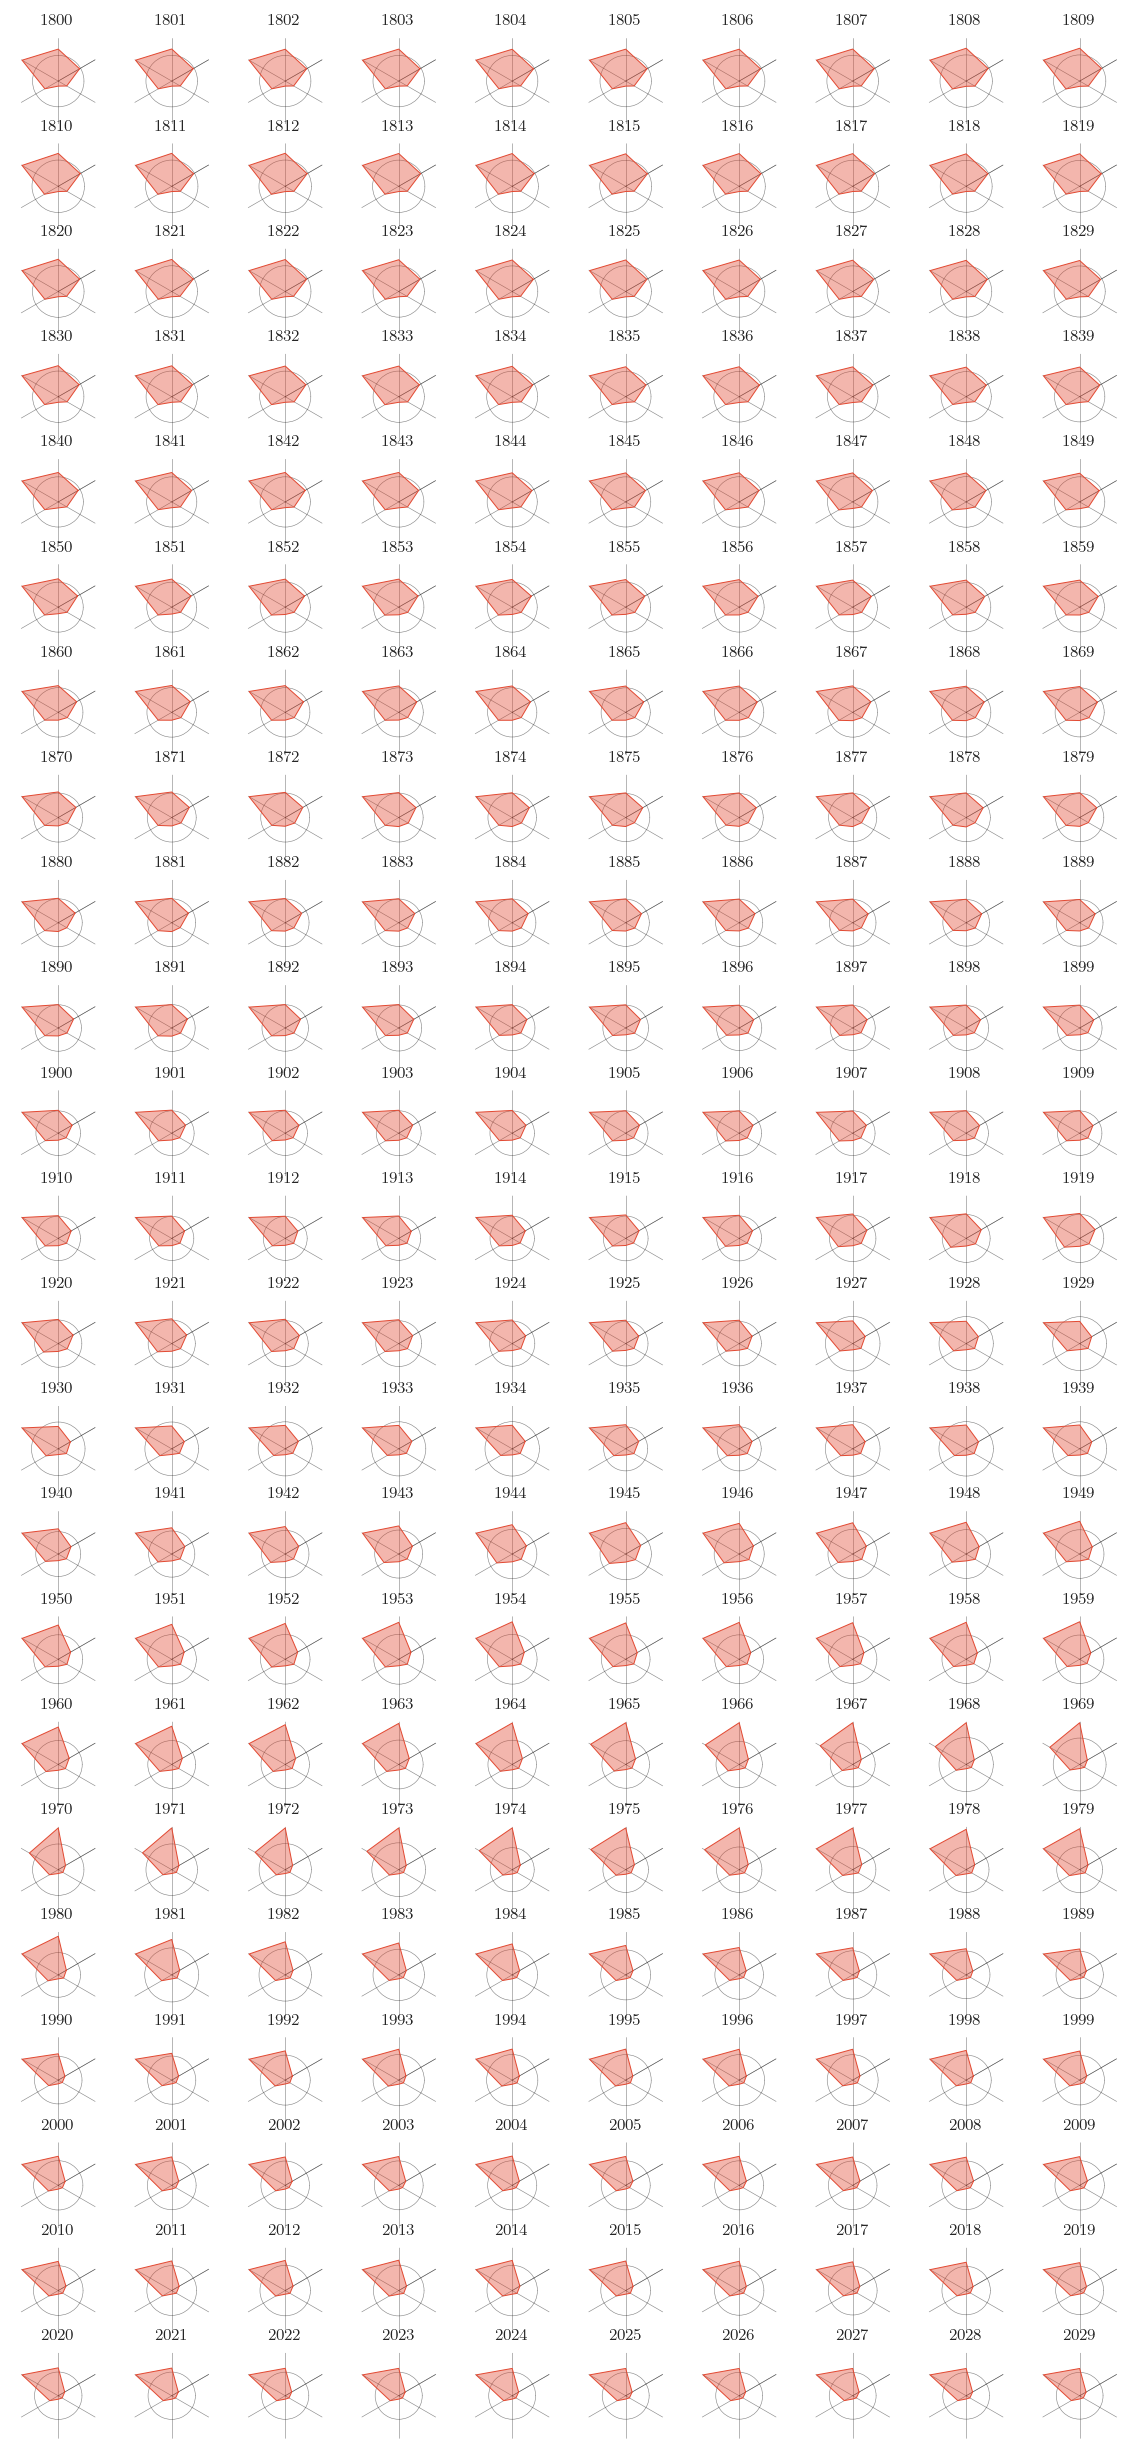

In [21]:
import matplotlib.pyplot as plt

num_axes = len(continents_gdp['Continent'].unique())    # ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

fig = plt.figure(figsize=(10,25))                       # set figure size
grouped = continents_gdp.groupby('year')                # groupby year

theta = np.radians([(30 + x*(360/num_axes))%360 for x in range(num_axes+1)])     

for idx,(year,group) in enumerate(grouped):
    if year==2030:
        break
    ax=plt.subplot(26,10, idx+1, projection='polar')
    r = group.prop_gdp.values
    r = np.append(r, r[0])
    
    ax.plot(theta, r , lw=0.5)
    ax.fill_between(theta, r, alpha=0.4)
    ax.grid( color='k', alpha=0.5, lw=0.3)
    ax.set_facecolor('white')
    ax.set_xticks(theta)
    ax.set_xticklabels([])                     # removing xticks
    ax.set_yticklabels([])
    ax.set_title(year, size=8)
    # removing yticks
    # ax.set_xlabel(name)
# plt.suptitle("Proportional income of continents from 1800-2030", size=12)

In [22]:
num_axes = len(continents_gdp['Continent'].unique())
np.radians([(30 + x*(360/num_axes))%360 for x in range(num_axes+1)])

array([0.52359878, 1.57079633, 2.61799388, 3.66519143, 4.71238898,
       5.75958653, 0.52359878])

## Apply
Split-apply combine strategy is not limited to transform/aggregate or filter. Custom functions can be used as well. 

### Goal: For each year, what are the countries that have a GDP in the 90th percentile?

Lets transform and filter our data to reveal this information.

In [23]:

# groupby year and create a new series q90 which contains the 90th percentile income for that year.
q90 = gapminder.groupby(['year'])['income'].transform(lambda x: x.quantile(0.9))

# filter the data to 
gapminder_rich = gapminder[gapminder['income'] >= q90]
gapminder_rich

,country,year,pop,income,lifeExp,Continent
856,United Arab Emirates,1903,47200.0,3980.0,35.9,Asia
857,United Arab Emirates,1904,47500.0,4270.0,36.1,Asia
858,United Arab Emirates,1905,47700.0,4580.0,36.2,Asia
859,United Arab Emirates,1906,48000.0,4920.0,36.4,Asia
860,United Arab Emirates,1907,48200.0,5300.0,36.5,Asia
...,...,...,...,...,...,...
45936,South Africa,1803,1460000.0,1700.0,33.5,Africa
45940,South Africa,1807,1490000.0,1730.0,33.5,Africa
45943,South Africa,1810,1500000.0,1630.0,33.5,Africa
45946,South Africa,1813,1520000.0,1650.0,33.5,Africa


We observe that the number of rows is significantly smaller than the original dataframe. This is as expected, since we have filtered the 90th percentile countries. Let's print each group.

In [24]:
for name,group in gapminder_rich.groupby('year'):
    print()
    print("Year: " , name)
    print()
    print(group.country)
    print("-------------------")


Year:  1800

1004          Argentina
2008            Austria
2761            Belgium
6024             Brunei
7279        Switzerland
10542    Czech Republic
10793           Germany
11295           Denmark
12801             Spain
14056            France
14809    United Kingdom
16566            Greece
20331            Israel
20582             Italy
30873       Netherlands
38403          Suriname
43674           Uruguay
43925     United States
45933      South Africa
Name: country, dtype: object
-------------------

Year:  1801

1005          Argentina
2009            Austria
2762            Belgium
6025             Brunei
7280        Switzerland
10543    Czech Republic
10794           Germany
11296           Denmark
12802             Spain
14057            France
14810    United Kingdom
16567            Greece
20332            Israel
20583             Italy
30874       Netherlands
38404          Suriname
43675           Uruguay
43926     United States
45934      South Africa
Name: count

The same can be done using the apply method in a single step. 
So far we've seen that 
1. The aggregate method, returns a single value for each group. 
2. The transform method, returns a dataframe/series of the same size as the input group

The apply method allows one to create custom functions that returns dataframes of **arbitrary sizes**

`apply` takes a function as argument and passes each group as a dataframe/series to the function. This function must return a dataframe/series.  

In the code cell below, the lambda function `lambda x: x[x['income'] >= x['income'].quantile(0.9)]` filters each group and returns different size dataframes for each group.

In [25]:
gapminder.groupby(['year']).apply(lambda x: x[x['income'] >= x['income'].quantile(0.9)])

country  year          pop    income  lifeExp      Continent
year                                                                          
1800 1004       Argentina  1800     534000.0    1710.0     33.2  South America
     2008         Austria  1800    3000000.0    2070.0     34.4         Europe
     2761         Belgium  1800    3250000.0    2670.0     40.0         Europe
     6024          Brunei  1800       2260.0    1690.0     29.2           Asia
     7279     Switzerland  1800    1750000.0    2740.0     38.0         Europe
...                   ...   ...          ...       ...      ...            ...
2050 34888          Qatar  2050    3850000.0  161000.0     80.5           Asia
     36645      Singapore  2050    6410000.0  164000.0     88.6           Asia
     39406         Sweden  2050   11400000.0   88100.0     86.7         Europe
     42920         Taiwan  2050   22400000.0  105000.0     84.9           Asia
     44175  United States  2050  379000000.0  108000.0     83.5  North America

[4800 rows x 6 columns]

### Missing value treatment by imputation 

We've learnt about `imputation` in our previous lab on missing value treatment. Imputation is the process of replacing missing values with substituted values. You can also substitute values specific to a group . Let's take a look at the `Melbourne Housing dataset` 

|Variables|Description|
|-|-|
|Rooms| Number of rooms|
|Price| Price in dollars|
|Method| S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.|
|Type| br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.|
|SellerG| Real Estate Agent|
|Date| Date sold|
|Distance| Distance from CBD|
|Regionname| General Region (West, North West, North, North east …etc)|
|Propertycount| Number of properties that exist in the suburb.|
|Bedroom2 | Scraped # of Bedrooms (from different source)|
|Bathroom| Number of Bathrooms|
|Car| Number of carspots|
|Landsize| Land Size|
|BuildingArea| Building Size|
|CouncilArea| Governing council for the area|

Let's load and explore the dataset. 

In [26]:
source = sv_rep_path + 'melb_data.csv'
melb_df = pd.read_csv(source)
melb_df.shape

(13580, 21)

In [27]:
melb_df.head().T

,0,1,2,3,4
Suburb,Abbotsford,Abbotsford,Abbotsford,Abbotsford,Abbotsford
Address,85 Turner St,25 Bloomburg St,5 Charles St,40 Federation La,55a Park St
Rooms,2,2,3,3,4
Type,h,h,h,h,h
Price,1480000.0,1035000.0,1465000.0,850000.0,1600000.0
Method,S,S,SP,PI,VB
SellerG,Biggin,Biggin,Biggin,Biggin,Nelson
Date,3/12/2016,4/02/2016,4/03/2017,4/03/2017,4/06/2016
Distance,2.5,2.5,2.5,2.5,2.5
Postcode,3067.0,3067.0,3067.0,3067.0,3067.0


In [28]:
melb_df.tail().T

,13575,13576,13577,13578,13579
Suburb,Wheelers Hill,Williamstown,Williamstown,Williamstown,Yarraville
Address,12 Strada Cr,77 Merrett Dr,83 Power St,96 Verdon St,6 Agnes St
Rooms,4,3,3,4,4
Type,h,h,h,h,h
Price,1245000.0,1031000.0,1170000.0,2500000.0,1285000.0
Method,S,SP,S,PI,SP
SellerG,Barry,Williams,Raine,Sweeney,Village
Date,26/08/2017,26/08/2017,26/08/2017,26/08/2017,26/08/2017
Distance,16.7,6.8,6.8,6.8,6.3
Postcode,3150.0,3016.0,3016.0,3016.0,3013.0


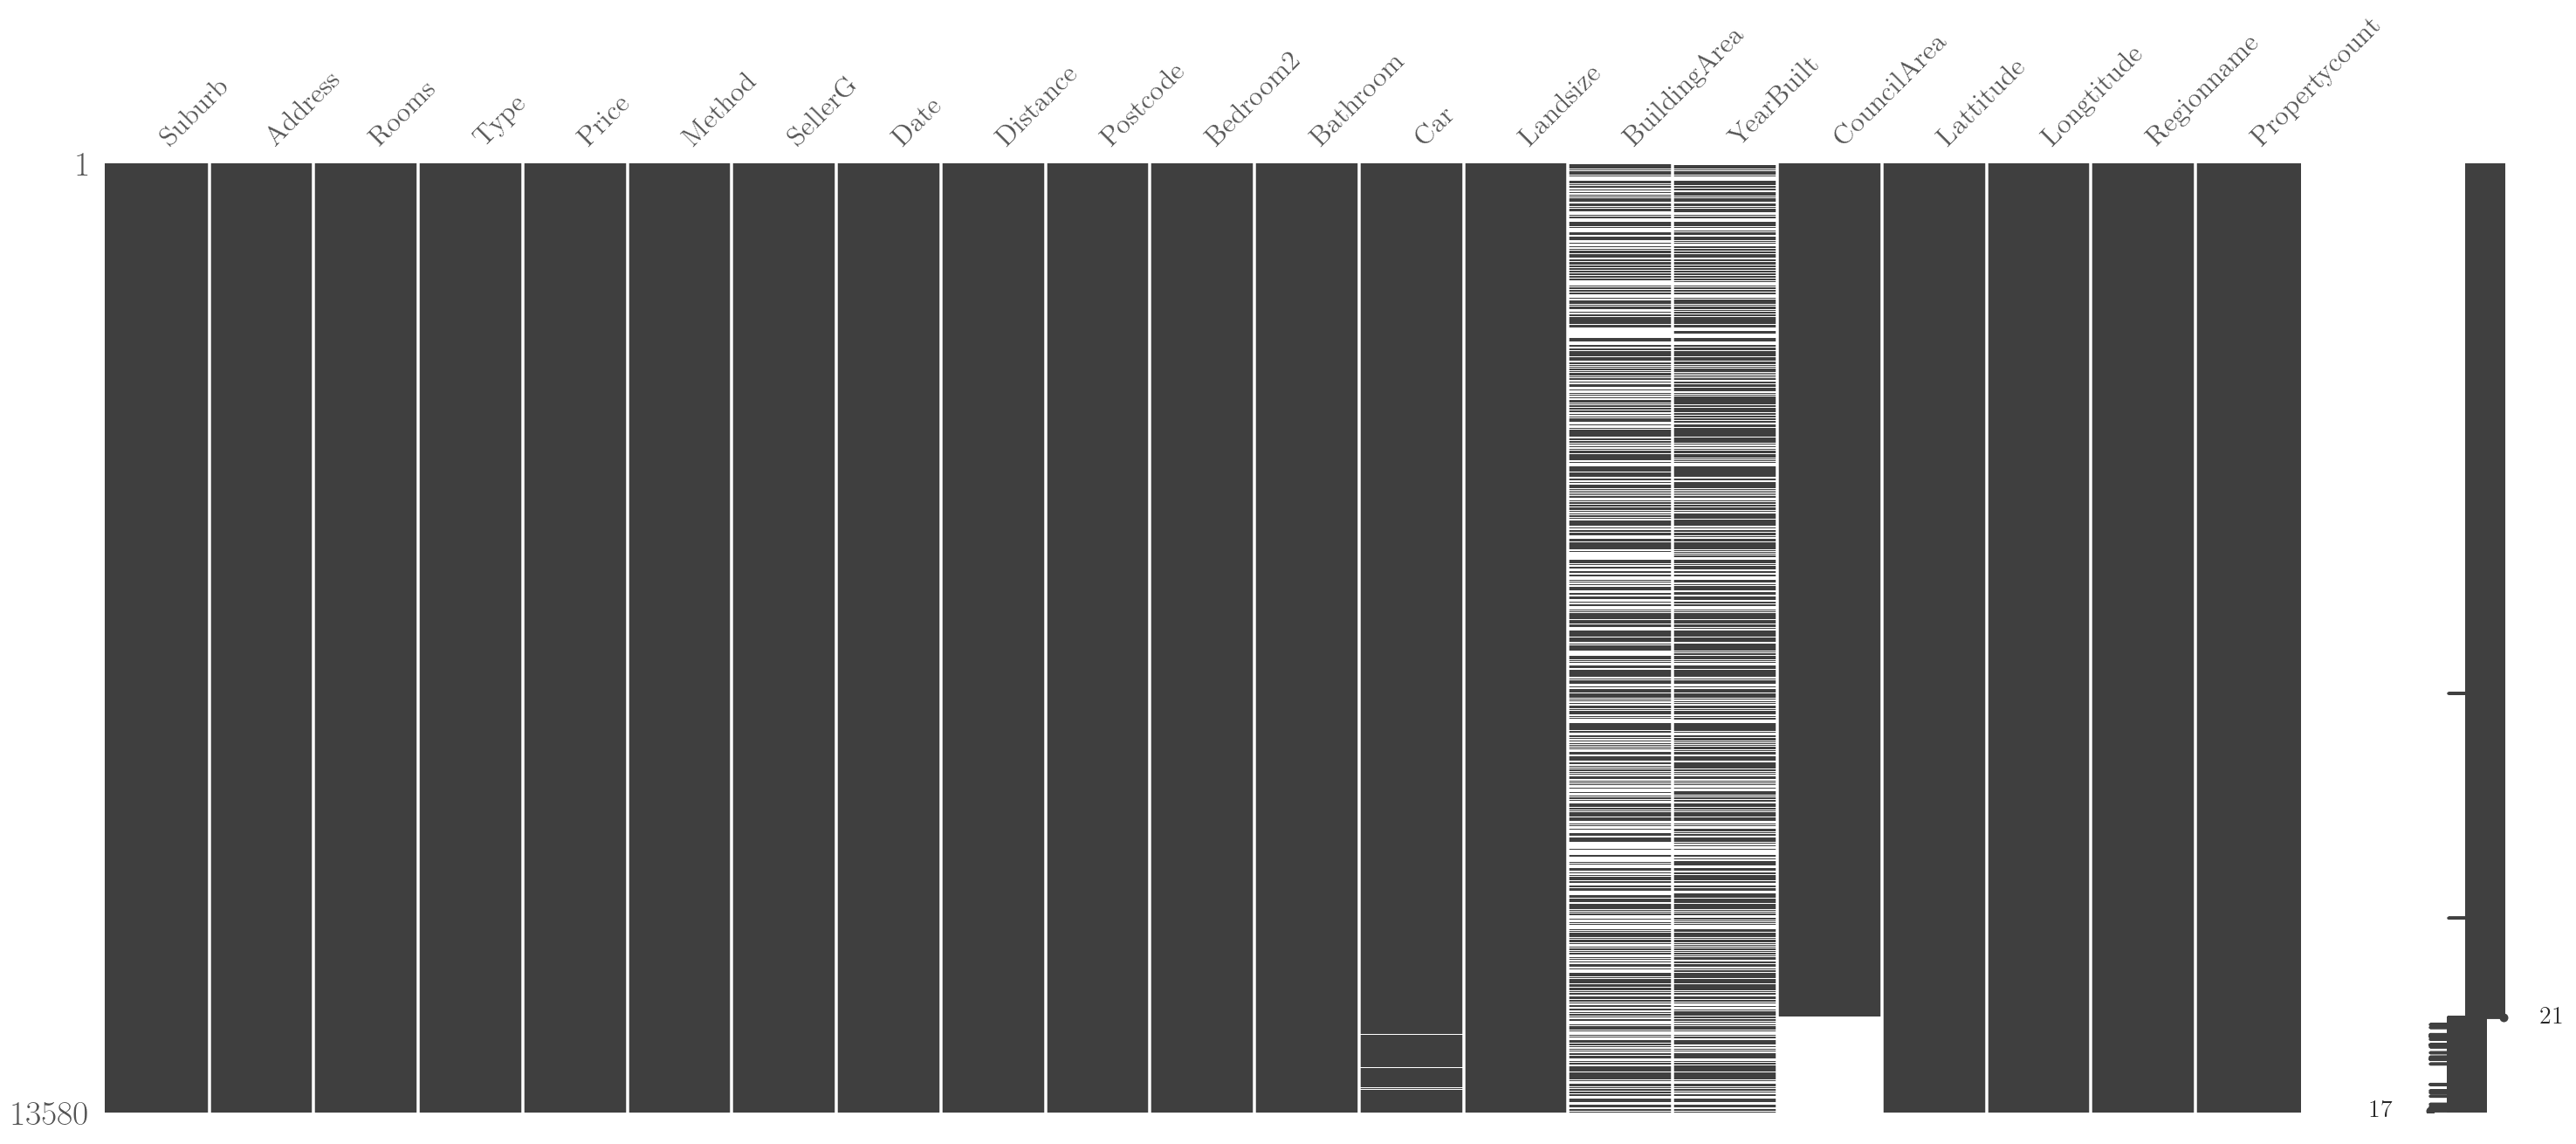

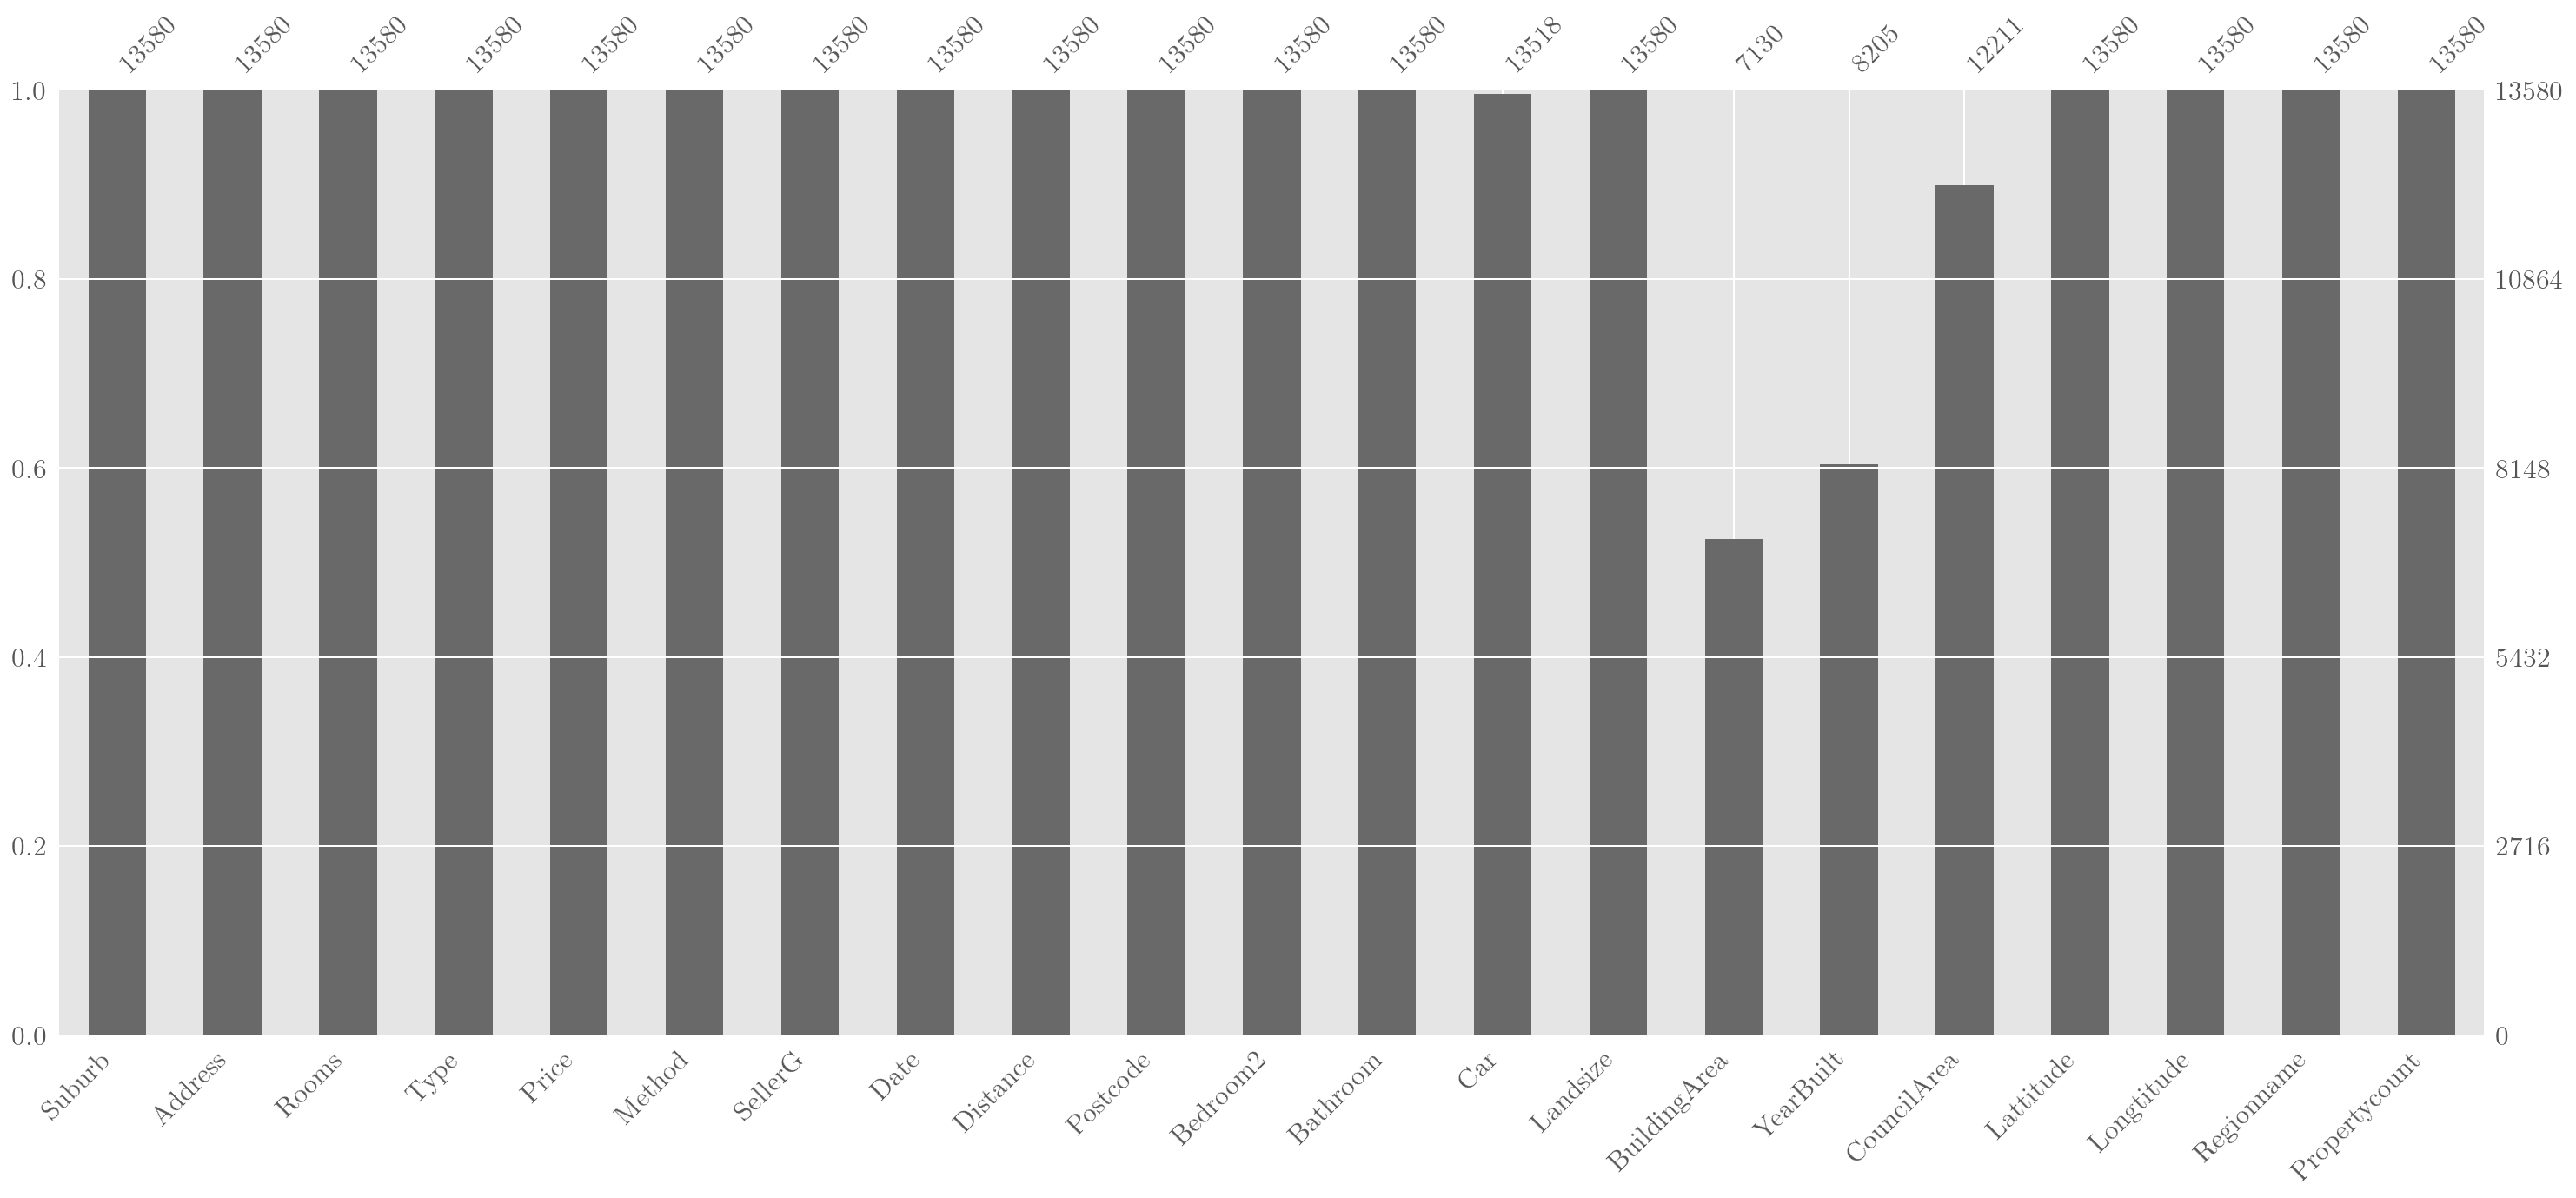

In [29]:
import missingno as msno
msno.matrix(melb_df)
plt.show()
msno.bar(melb_df)

plt.show()

For the purpose of this exercise let's assume that 200 random values of the Bathroom variable are missing. 

In [30]:
# remove 200 values from the Bathroom column 
melb_df.loc[np.random.permutation(melb_df.index)[:200], 'Bathroom']= np.NaN

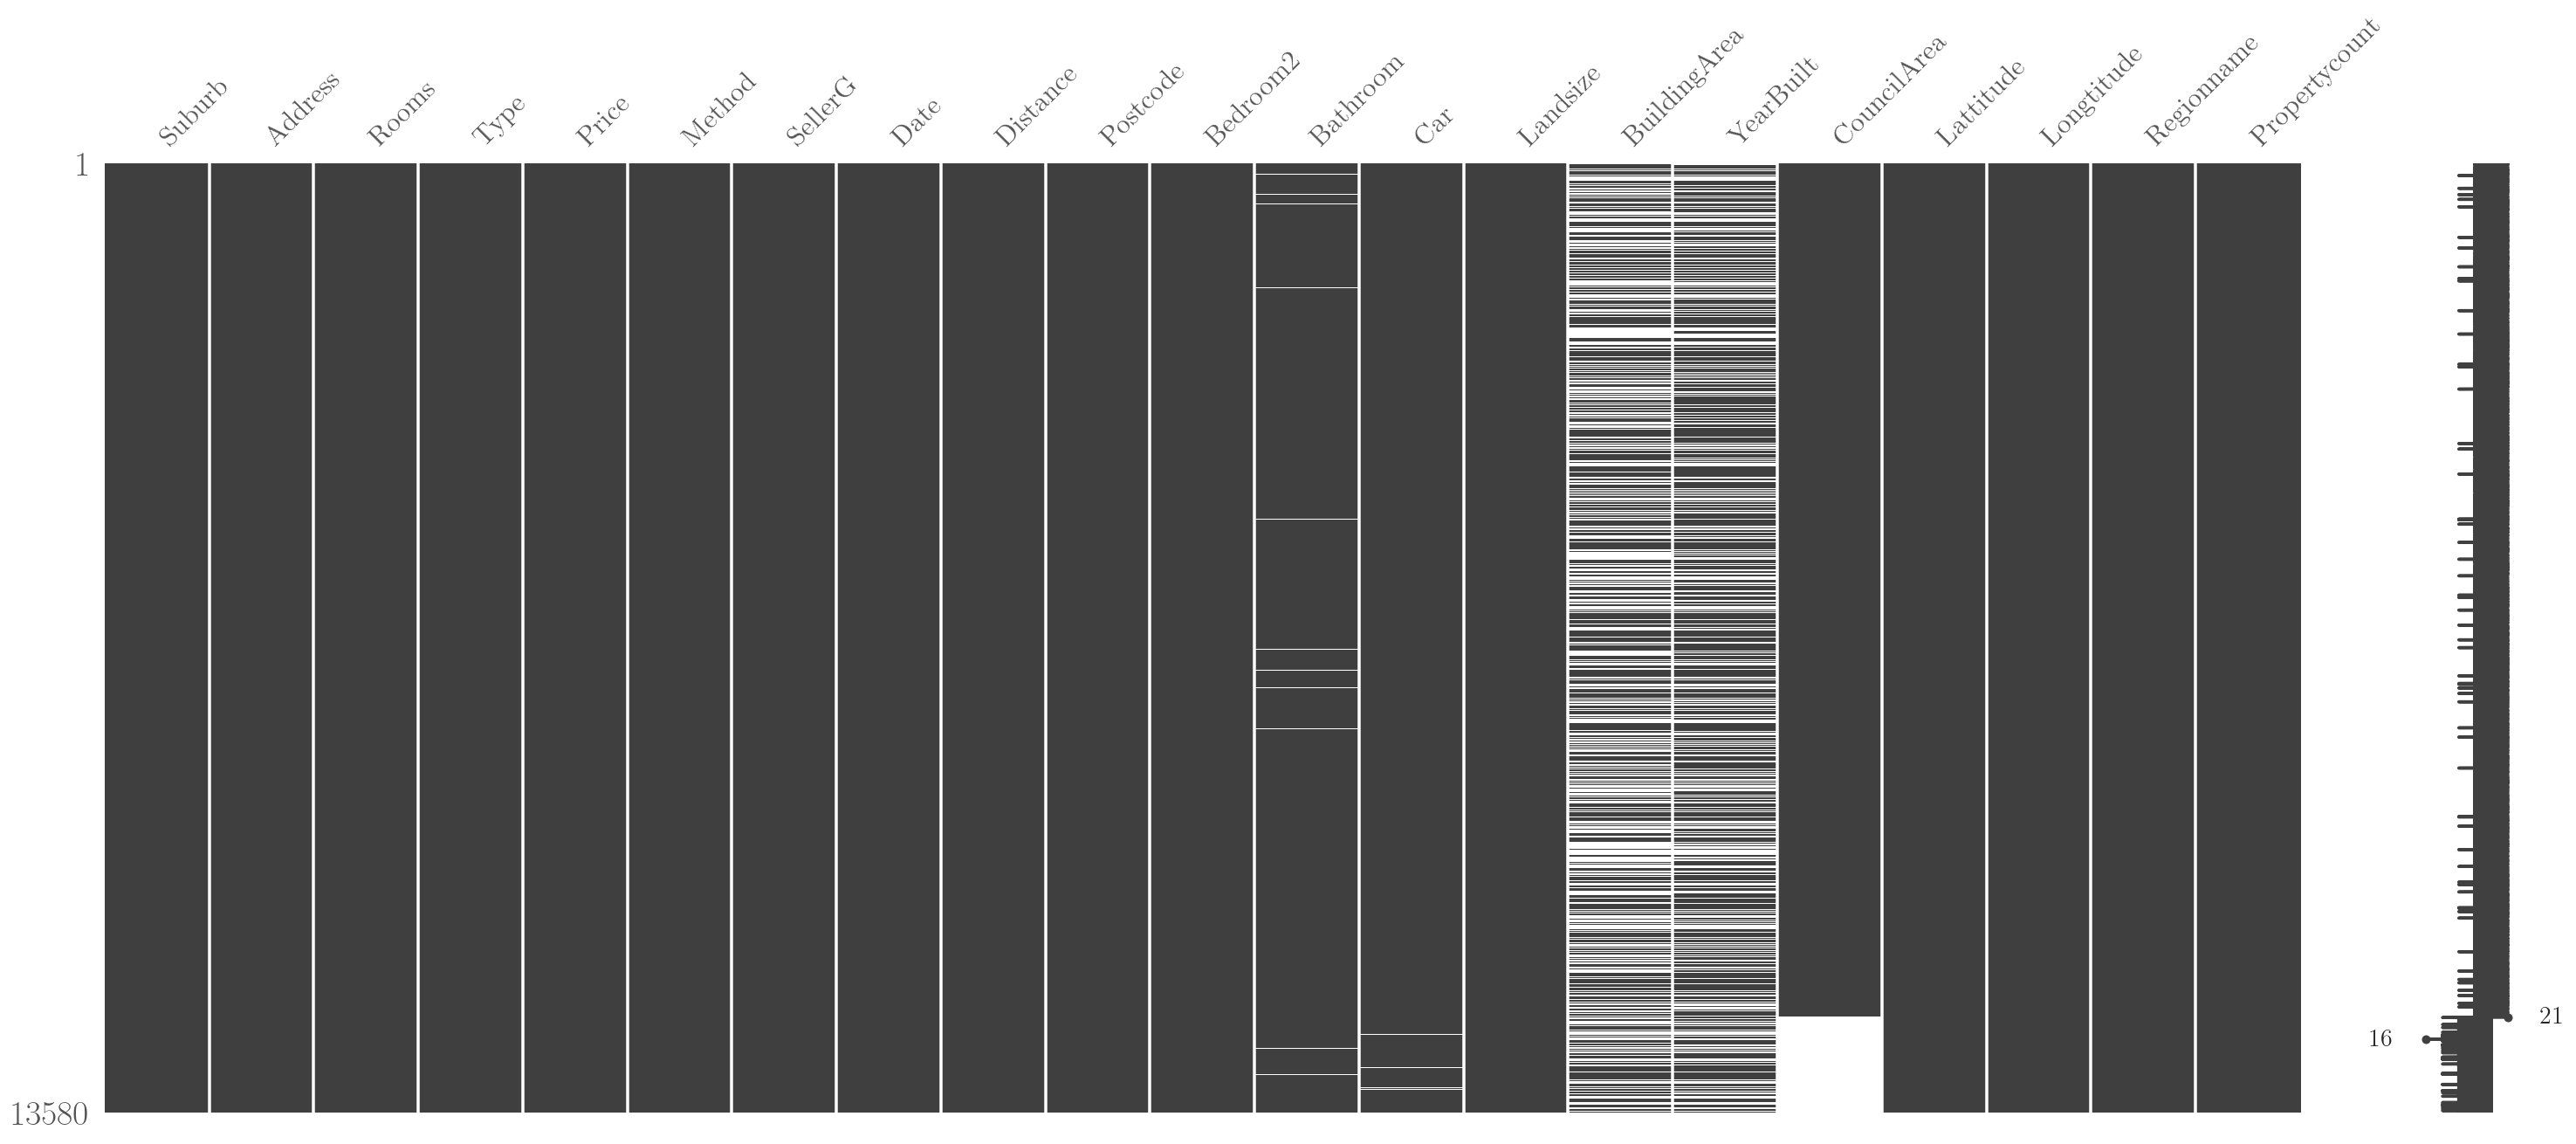

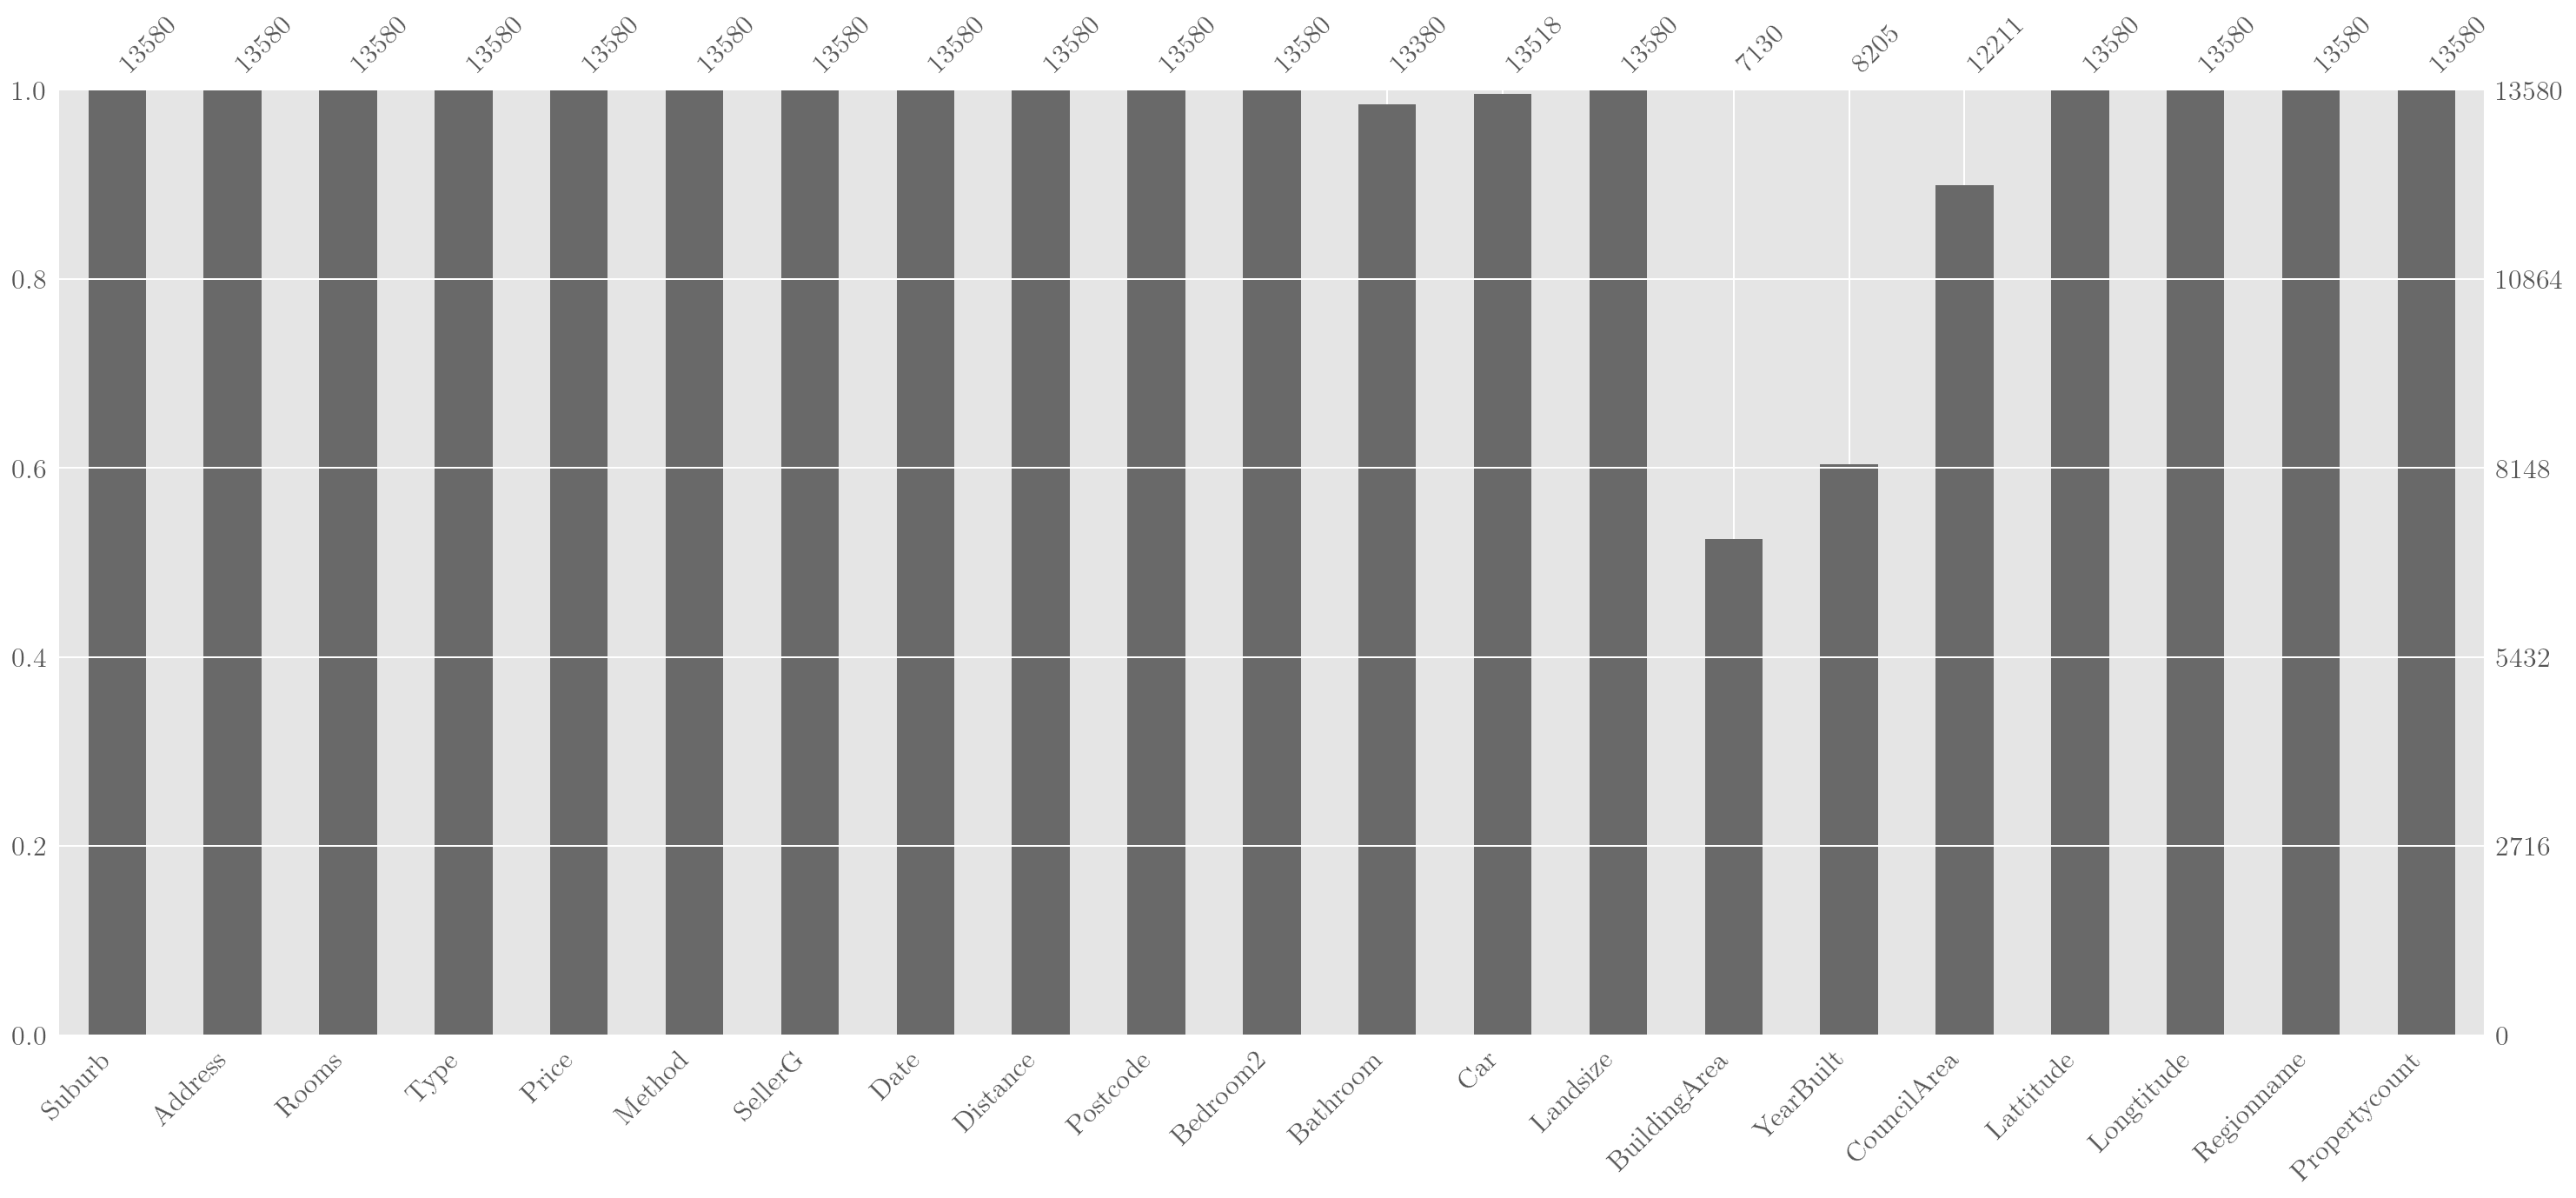

In [31]:
msno.matrix(melb_df)
plt.show()
msno.bar(melb_df)

plt.show()

Our goal is to impute the missing values of the Bathroom column by it's median. However we do not want to do it with the overall median. Let's say we make an educated guess that the number of bathrooms closely relates to the number of rooms and the type of housing (Or check the correlation between variables). Is there a way to use this information while dealing with missing values?


We can group the dataset by `Rooms` and `Type`. We can then fill missing values with the median of each group as shown below 

In [32]:
# imputation my median
def fill_median(x):
    median = x.median()
    # fill missing values with median
    return(x.fillna(median))

# SPLIT
#1 groupby Rooms and Type
#2 subset the Bathroom column

grouped = melb_df.groupby(['Rooms', 'Type'])['Bathroom']

for name, group in grouped:
    print(f'group: {name}')
    print(f'size: {group.shape}')

# APPLY-COMBINE
#3 transform the column by a function
melb_df['Bathroom_filled'] = grouped.transform(fill_median)


melb_df[['Bathroom', 'Bathroom_filled']]

group: (1, 'h')
size: (58,)
group: (1, 't')
size: (11,)
group: (1, 'u')
size: (612,)
group: (2, 'h')
size: (1398,)
group: (2, 't')
size: (319,)
group: (2, 'u')
size: (1931,)
group: (3, 'h')
size: (4801,)
group: (3, 't')
size: (629,)
group: (3, 'u')
size: (451,)
group: (4, 'h')
size: (2517,)
group: (4, 't')
size: (150,)
group: (4, 'u')
size: (21,)
group: (5, 'h')
size: (591,)
group: (5, 't')
size: (5,)
group: (6, 'h')
size: (66,)
group: (6, 'u')
size: (1,)
group: (7, 'h')
size: (10,)
group: (8, 'h')
size: (7,)
group: (8, 'u')
size: (1,)
group: (10, 'h')
size: (1,)


,Bathroom,Bathroom_filled
0,1.0,1.0
1,1.0,1.0
2,2.0,2.0
3,2.0,2.0
4,1.0,1.0
...,...,...
13575,2.0,2.0
13576,2.0,2.0
13577,2.0,2.0
13578,1.0,1.0


Let's specifically look at the rows that have missing values in the Bathroom column

In [33]:
filter = melb_df['Bathroom'].isna()

melb_df[filter][['Type','Rooms','Bathroom','Bathroom_filled']]

,Type,Rooms,Bathroom,Bathroom_filled
63,h,4,NaN,2.0
99,h,2,NaN,1.0
102,h,3,NaN,1.0
168,h,3,NaN,1.0
169,u,2,NaN,1.0
...,...,...,...,...
13106,h,3,NaN,1.0
13263,t,3,NaN,2.0
13405,h,5,NaN,3.0
13435,h,3,NaN,1.0


We observe that the missing values are filled differently for the different groups

# Summary

We've learnt about 
1. the split-apply-combine technique with groupby
2. Aggregate
3. Transform
4. Apply

    